### Student Information_Third part
Name: 莊安琦

Student ID: 108064532

GitHub ID: anchichuang


#### Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
- Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
- Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .
- Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

### New Data Visualizations

#### Positive Word Cloud of imdb dataset

In [7]:
file_list_imdb = ['imdb_labelled']
file_list_yelp = ['yelp_labelled']
file_list_amazon = ['amazon_cells_labelled']

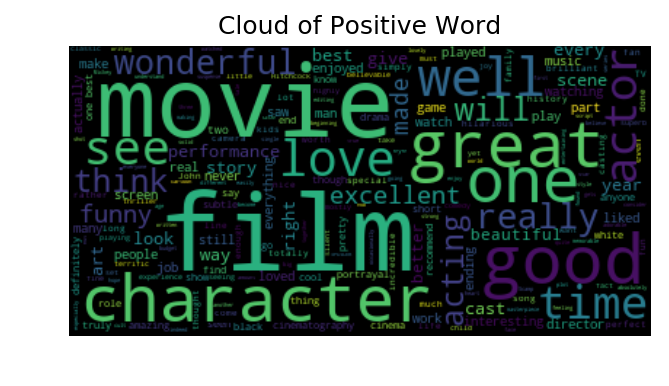

In [11]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(sentiment_df_imdb['text'][sentiment_df_imdb['score'] == 1].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Positive Word')
plt.show()

#### Negative Word Cloud of imdb dataset

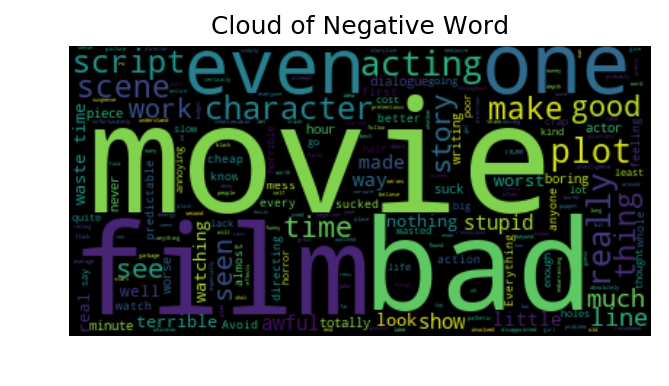

In [14]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(sentiment_df_imdb['text'][sentiment_df_imdb['score'] == 0].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Negative Word')
plt.show()

#### Positive Word Cloud of yelp dataset

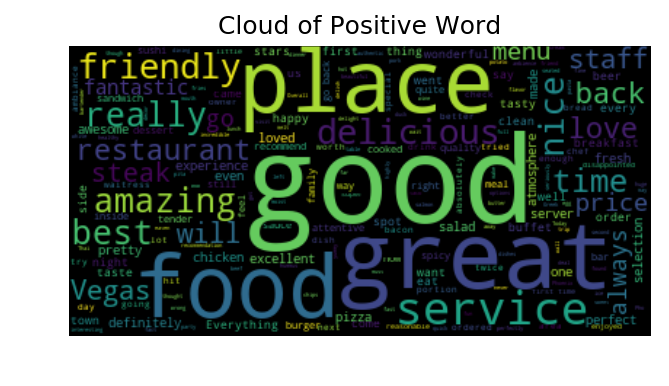

In [15]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(sentiment_df_yelp['text'][sentiment_df_yelp['score'] == 1].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Positive Word')
plt.show()

#### Negative Word Cloud of yelp dataset

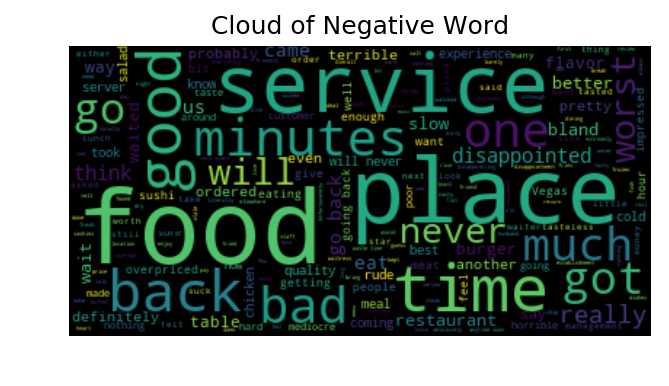

In [16]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(sentiment_df_yelp['text'][sentiment_df_yelp['score'] == 0].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Negative Word')
plt.show()

#### Positive Word Cloud of amazon datase

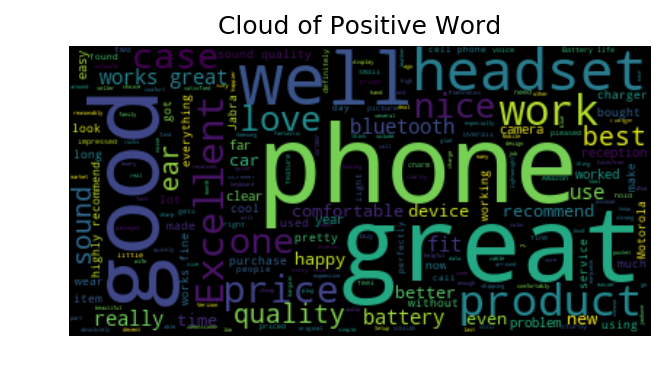

In [20]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(sentiment_df_amazon['text'][sentiment_df_amazon['score'] == 1].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Positive Word')
plt.show()

#### Negative Word Cloud of amazon datase

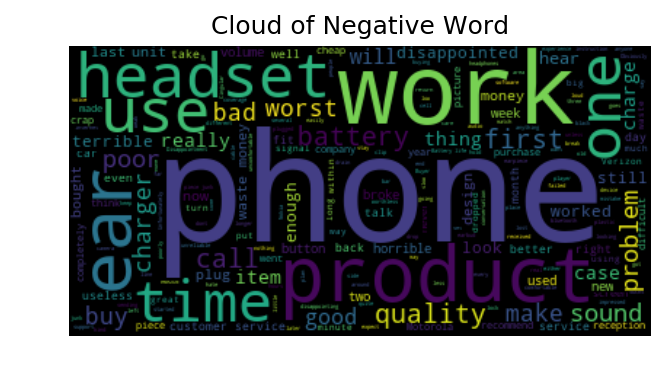

In [22]:
from wordcloud import WordCloud
#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(sentiment_df_amazon['text'][sentiment_df_amazon['score'] == 0].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Negative Word')
plt.show()

### Feature Creation(TF-IDF)

#### Feature creation(TF-IDF) of imdb dataset

In [28]:
#answer here(load data)
import nltk, re
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import pandas as pd

init_notebook_mode(connected=True)

#file_list = ['imdb_labelled', 'yelp_labelled' , 'amazon_cells_labelled']
file_list_imdb = ['imdb_labelled']#, 'yelp_labelled' , 'amazon_cells_labelled']

sentiment_df = pd.concat([pd.read_csv('sentiment labelled sentences/{}.txt'.format(f_name), 
                                      sep=sep,
                                      header=None,
                                     engine='python')  
                          
                          for f_name, sep in zip(file_list_imdb, [' \t', '\t', '\t'])])
sentiment_df.columns = ['text', 'score']
'''
def tokenize_text(text, remove_stopwords=False):
    tokens = [word for d in nltk.sent_tokenize(text, language='english') 
              for word in nltk.word_tokenize(d, language='english')]
    return tokens
'''

"\ndef tokenize_text(text, remove_stopwords=False):\n    tokens = [word for d in nltk.sent_tokenize(text, language='english') \n              for word in nltk.word_tokenize(d, language='english')]\n    return tokens\n"

In [46]:
#use .fit_transform() to get weights matrix
#max_df is used for removing terms that appear too frequently
#max_df = 0.50 means "ignore terms that appear in more than 50% of the documents"
#min_df is used for removing terms that appear too infrequently
#min_df = 0.01 means "ignore terms that appear in less than 1% of the documents"
#min_df = 5 means "ignore terms that appear in less than 5 documents
x_train, x_test, y_train, y_test = train_test_split(sentiment_df_imdb['text'], sentiment_df_imdb['score'], test_size=0.3, random_state=40,stratify=sentiment_df_imdb['score'])

tfidf_vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
print('---imdb dataset---')
#count tfidf value
print(tfidf_train)
tfidf_value = tfidf_vect.fit_transform(sentiment_df_imdb['text'])
print(tfidf_value.shape)

---imdb dataset---
  (0, 1432)	0.09853261760817535
  (0, 1854)	0.3847967892039112
  (0, 357)	0.31929488034649994
  (0, 646)	0.24953241606468307
  (0, 184)	0.2747441592682159
  (0, 47)	0.2207436312774482
  (0, 126)	0.21029754179789184
  (0, 725)	0.3847967892039112
  (0, 74)	0.12503932296432513
  (0, 278)	0.2687769425820803
  (0, 43)	0.3543401360287359
  (0, 77)	0.3847967892039112
  (1, 1432)	0.08724723154266228
  (1, 74)	0.11071800412314474
  (1, 158)	0.17036213682077755
  (1, 148)	0.09947151143630618
  (1, 1786)	0.11547155189651358
  (1, 1150)	0.17036213682077755
  (1, 1371)	0.11776837307772751
  (1, 738)	0.057717426051501
  (1, 1327)	0.10404532894496414
  (1, 166)	0.13376841353793492
  (1, 786)	0.06228457686191567
  (1, 181)	0.17036213682077755
  (1, 1578)	0.16276825312047105
  :	:
  (696, 868)	0.32750684367803196
  (696, 1092)	0.34189062863528275
  (696, 1703)	0.42249114622747497
  (696, 1098)	0.33294985680550904
  (696, 928)	0.4864673761944807
  (696, 1167)	0.4688630461682286
  (697

In [50]:
x_train, x_test, y_train, y_test = train_test_split(sentiment_df_yelp['text'], sentiment_df_yelp['score'], test_size=0.3, random_state=40,stratify=sentiment_df_yelp['score'])

tfidf_vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
print('---yelp dataset---')
#count tfidf value
print(tfidf_train)
tfidf_value = tfidf_vect.fit_transform(sentiment_df_yelp['text'])
print(tfidf_value.shape)

---yelp dataset---
  (0, 1060)	0.15964460125397317
  (0, 731)	0.1872244858861589
  (0, 993)	0.16238571996749213
  (0, 1250)	0.18761902439509018
  (0, 209)	0.16538827579972118
  (0, 621)	0.08956230329947483
  (0, 217)	0.11871329979461673
  (0, 1247)	0.15964460125397317
  (0, 1528)	0.36514756688053734
  (0, 474)	0.15964460125397317
  (0, 1468)	0.1405495098810544
  (0, 877)	0.194254175398846
  (0, 437)	0.10108372810224733
  (0, 39)	0.0648787248473572
  (0, 891)	0.10233566735790997
  (0, 94)	0.11731293627380567
  (0, 475)	0.18148081134041086
  (0, 941)	0.18148081134041086
  (0, 706)	0.18148081134041086
  (0, 210)	0.20331702142684857
  (0, 223)	0.20331702142684857
  (0, 1249)	0.20331702142684857
  (0, 1532)	0.194254175398846
  (0, 1471)	0.20331702142684857
  (0, 78)	0.1872244858861589
  :	:
  (698, 1149)	0.15944961565283472
  (698, 1384)	0.2153983347930236
  (698, 602)	0.14438330037607522
  (698, 1347)	0.21508398239879106
  (698, 612)	0.2362329284028596
  (698, 1230)	0.20075438929537537
  (

In [52]:
x_train, x_test, y_train, y_test = train_test_split(sentiment_df_amazon['text'], sentiment_df_amazon['score'], test_size=0.3, random_state=40,stratify=sentiment_df_amazon['score'])

tfidf_vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
print('---amazon dataset---')
#count tfidf value
print(tfidf_train)
tfidf_value = tfidf_vect.fit_transform(sentiment_df_amazon['text'])
print(tfidf_value.shape)

---amazon dataset---
  (0, 1111)	0.12645650498237615
  (0, 511)	0.25750620759655973
  (0, 745)	0.3820961500289137
  (0, 1043)	0.26147548243176116
  (0, 31)	0.29961724426717967
  (0, 486)	0.3166487127774921
  (0, 1403)	0.20886367517232574
  (0, 953)	0.32173044168388354
  (0, 1133)	0.3914788295946456
  (0, 487)	0.3399947201662085
  (0, 1406)	0.31194376669016566
  (1, 1318)	0.2983947562281763
  (1, 1291)	0.5471442559564202
  (1, 1023)	0.4241347309758518
  (1, 432)	0.39193317721961657
  (1, 724)	0.5273441449414233
  (2, 745)	0.14517642867490016
  (2, 1403)	0.15871440965389552
  (2, 438)	0.24061969356174842
  (2, 9)	0.3113616355478427
  (2, 531)	0.2779214541062424
  (2, 982)	0.24867904813805056
  (2, 546)	0.16603813649951446
  (2, 1392)	0.29748270626689016
  (2, 856)	0.2640425248252899
  :	:
  (695, 635)	0.30287914996170645
  (695, 249)	0.3978365895680291
  (695, 553)	0.3978365895680291
  (696, 133)	0.58440062991186
  (696, 648)	0.8114652819182231
  (697, 42)	0.18541132164084467
  (697, 603

### Naive Bayes classifier with TF-IDF features

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score
clf = MultinomialNB(alpha=0.01)
clf.fit(tfidf_train.toarray(), y_train)
y_predict = clf.predict(tfidf_test.toarray())
recall = recall_score(y_test, y_predict, average='macro')
print('---imdb dataset---')
print('Recall: ',recall)
accuracy = clf.score(tfidf_test.toarray(),y_test)
print('Accuracy: ',accuracy)


---imdb dataset---
Recall:  0.77
Accuracy:  0.77


In [51]:
clf = MultinomialNB(alpha=0.01)
clf.fit(tfidf_train.toarray(), y_train)
y_predict = clf.predict(tfidf_test.toarray())
recall = recall_score(y_test, y_predict, average='macro')
print('---yelp dataset---')
print('Recall: ',recall)
accuracy = clf.score(tfidf_test.toarray(),y_test)
print('Accuracy: ',accuracy)

---yelp dataset---
Recall:  0.79
Accuracy:  0.79


In [53]:
clf = MultinomialNB(alpha=0.01)
clf.fit(tfidf_train.toarray(), y_train)
y_predict = clf.predict(tfidf_test.toarray())
recall = recall_score(y_test, y_predict, average='macro')
print('---amazon dataset---')
print('Recall: ',recall)
accuracy = clf.score(tfidf_test.toarray(),y_test)
print('Accuracy: ',accuracy)

---amazon dataset---
Recall:  0.8266666666666667
Accuracy:  0.8266666666666667


### Naive Bayes classifier with word frequency features

In [92]:
from sklearn.feature_extraction.text import CountVectorizer       
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(sentiment_df_imdb['text'], sentiment_df_imdb['score'], test_size=0.3, random_state=40,stratify=sentiment_df_imdb['score'])

count_vect = CountVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
count_train = count_vect.fit_transform(x_train_f)
count_test = count_vect.transform(x_test_f)
print('---imdb dataset---')
#count tfidf value
print(count_train)
count_value = count_vect.fit_transform(sentiment_df_imdb['text'])

---imdb dataset---
  (0, 77)	1
  (0, 43)	1
  (0, 278)	1
  (0, 74)	1
  (0, 725)	1
  (0, 126)	1
  (0, 47)	1
  (0, 184)	1
  (0, 646)	1
  (0, 357)	1
  (0, 1854)	1
  (0, 1432)	1
  (1, 1027)	1
  (1, 1581)	1
  (1, 1069)	1
  (1, 1641)	1
  (1, 1026)	1
  (1, 491)	1
  (1, 1580)	1
  (1, 1068)	1
  (1, 121)	1
  (1, 360)	1
  (1, 835)	1
  (1, 1631)	1
  (1, 14)	1
  :	:
  (696, 928)	1
  (696, 1098)	1
  (696, 1703)	1
  (696, 1092)	1
  (696, 868)	1
  (696, 1039)	1
  (697, 1025)	1
  (697, 1226)	1
  (697, 1021)	1
  (698, 1387)	1
  (698, 832)	1
  (698, 1432)	1
  (699, 1534)	1
  (699, 105)	1
  (699, 1375)	1
  (699, 1533)	1
  (699, 1374)	1
  (699, 1861)	1
  (699, 1130)	1
  (699, 1662)	1
  (699, 103)	1
  (699, 1735)	1
  (699, 1078)	1
  (699, 74)	1
  (699, 1432)	1


In [85]:
from sklearn.feature_extraction.text import CountVectorizer       
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(sentiment_df_yelp['text'], sentiment_df_yelp['score'], test_size=0.3, random_state=40,stratify=sentiment_df_yelp['score'])

count_vect = CountVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
count_train = count_vect.fit_transform(x_train_f)
count_test = count_vect.transform(x_test_f)
print('---yelp dataset---')
#count tfidf value
print(count_train)
count_value = count_vect.fit_transform(sentiment_df_yelp['text'])


---yelp dataset---
  (0, 1530)	1
  (0, 1262)	1
  (0, 96)	1
  (0, 1529)	1
  (0, 905)	1
  (0, 1256)	1
  (0, 78)	1
  (0, 1471)	1
  (0, 1532)	1
  (0, 1249)	1
  (0, 223)	1
  (0, 210)	1
  (0, 706)	1
  (0, 941)	1
  (0, 475)	1
  (0, 94)	1
  (0, 891)	1
  (0, 39)	1
  (0, 437)	1
  (0, 877)	1
  (0, 1468)	1
  (0, 474)	1
  (0, 1528)	3
  (0, 1247)	1
  (0, 217)	1
  :	:
  (698, 798)	1
  (698, 1226)	1
  (698, 1514)	1
  (698, 1007)	1
  (698, 1412)	1
  (698, 1008)	1
  (698, 1225)	1
  (698, 1513)	1
  (698, 931)	1
  (698, 1338)	1
  (698, 1233)	1
  (698, 1230)	1
  (698, 612)	1
  (698, 1347)	1
  (698, 602)	1
  (698, 1384)	2
  (698, 1149)	2
  (699, 1287)	1
  (699, 349)	1
  (699, 1230)	1
  (699, 1282)	1
  (699, 650)	1
  (699, 1384)	1
  (699, 643)	1
  (699, 474)	1


In [90]:
from sklearn.feature_extraction.text import CountVectorizer       
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(sentiment_df_amazon['text'], sentiment_df_amazon['score'], test_size=0.3, random_state=40,stratify=sentiment_df_amazon['score'])

count_vect = CountVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
count_train = count_vect.fit_transform(x_train_f)
count_test = count_vect.transform(x_test_f)
print('---amazon dataset---')
#count tfidf value
print(count_train)
count_value = count_vect.fit_transform(sentiment_df_amazon['text'])

---amazon dataset---
  (0, 1406)	1
  (0, 487)	1
  (0, 1133)	1
  (0, 953)	1
  (0, 1403)	1
  (0, 486)	1
  (0, 31)	1
  (0, 1043)	1
  (0, 745)	2
  (0, 511)	1
  (0, 1111)	1
  (1, 724)	1
  (1, 432)	1
  (1, 1023)	1
  (1, 1291)	1
  (1, 1318)	1
  (2, 478)	1
  (2, 904)	1
  (2, 550)	1
  (2, 938)	1
  (2, 1196)	1
  (2, 475)	1
  (2, 780)	1
  (2, 496)	1
  (2, 903)	1
  :	:
  (695, 603)	1
  (695, 546)	1
  (695, 1111)	1
  (696, 648)	1
  (696, 133)	1
  (697, 1230)	1
  (697, 672)	1
  (697, 1267)	1
  (697, 671)	1
  (697, 603)	1
  (697, 42)	1
  (698, 1077)	1
  (698, 39)	1
  (699, 1100)	1
  (699, 551)	1
  (699, 94)	1
  (699, 752)	1
  (699, 448)	1
  (699, 305)	1
  (699, 495)	1
  (699, 1097)	1
  (699, 333)	1
  (699, 550)	1
  (699, 546)	1
  (699, 745)	1


In [87]:
clf = MultinomialNB(alpha=0.001)
clf.fit(count_train.toarray(), y_train_f)
y_predict_f = clf.predict(count_test.toarray())
recall = recall_score(y_test_f, y_predict_f, average='macro')
print('---imdb dataset---')
print('Recall: ',recall)
accuracy = clf.score(count_test.toarray(),y_test_f)
print('Accuracy: ',accuracy)

---imdb dataset---
Recall:  0.8300000000000001
Accuracy:  0.83


In [88]:
clf = MultinomialNB(alpha=0.001)
clf.fit(tfidf_train.toarray(), y_train_f)
y_predict_f = clf.predict(tfidf_test.toarray())
recall = recall_score(y_test_f, y_predict_f, average='macro')
print('---yelp dataset---')
print('Recall: ',recall)
accuracy = clf.score(tfidf_test.toarray(),y_test_f)
print('Accuracy: ',accuracy)

---yelp dataset---
Recall:  0.8266666666666667
Accuracy:  0.8266666666666667


In [91]:
clf = MultinomialNB(alpha=0.01)
clf.fit(tfidf_train.toarray(), y_train_f)
y_predict_f = clf.predict(tfidf_test.toarray())
recall = recall_score(y_test_f, y_predict_f, average='macro')
print('---amazon dataset---')
print('Recall: ',recall)
accuracy = clf.score(tfidf_test.toarray(),y_test_f)
print('Accuracy: ',accuracy)

---amazon dataset---
Recall:  0.8266666666666667
Accuracy:  0.8266666666666667
